# Factor Interactions

In [1]:
from collections import OrderedDict

import pandas as pd
import statsmodels.api as sm

C:\Users\samth\Miniconda3\envs\econ36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
factors = pd.read_csv("C:/Data/Thesis/_Factors.csv")

print(factors.date.min(), factors.date.max())

factors.head()

196307 201712


,date,rf,rm,smb,hml,rmw,cma,wml,hmlm
0,196307,0.27,-0.39,-0.46,-0.81,0.72,-1.16,0.99,-0.59
1,196308,0.25,5.07,-0.81,1.65,0.42,-0.40,1.08,0.28
2,196309,0.27,-1.57,-0.48,0.19,-0.80,0.23,0.13,0.27
3,196310,0.29,2.53,-1.29,-0.09,2.75,-2.26,3.14,-2.11
4,196311,0.27,-0.85,-0.85,1.71,-0.34,2.22,-0.75,0.91


In [5]:
factors.iloc[:,1:].mean().round(2)

rf      0.39
rm      0.53
smb     0.25
hml     0.35
rmw     0.25
cma     0.29
wml     0.66
hmlm    0.30
dtype: float64

In [3]:
myfactors = pd.read_csv("C:/Data/Thesis/_MyFactors.csv")

print(myfactors.date.min(), myfactors.date.max())

myfactors.iloc[:,1:] = myfactors.iloc[:,1:]*100

myfactors.head()

1963-07-31 2017-12-29


,date,HML,HMLs,HMLb,HMLm,HMLms,HMLmb,PMU06,PMU06s,PMU06b,...,PMU16b,PMU,PMUs,PMUb,CMA,CMAs,CMAb,WML,WML.1,WML.2
0,1963-07-31,-0.721155,0.226475,-1.668786,-0.864465,-0.396422,-1.332508,0.888426,1.130721,0.646132,...,0.727895,0.355650,0.291664,0.419635,-1.132040,-1.043531,-1.220548,0.550726,0.550726,0.550726
1,1963-08-30,1.000628,0.089200,1.912055,-0.060107,-0.537487,0.417273,0.212301,0.330164,0.094438,...,0.531243,0.456718,-0.019635,0.933071,-0.070141,-2.002082,1.861800,1.443902,1.443902,1.443902
2,1963-09-30,1.045719,1.334372,0.757067,1.463823,2.269095,0.658551,-1.169019,-2.465363,0.127324,...,-0.075949,-0.665664,-1.253507,-0.077821,-0.361107,0.804768,-1.526981,0.267052,0.267052,0.267052
3,1963-10-31,-0.549914,0.575684,-1.675512,-1.635921,-0.295457,-2.976385,2.612164,0.632711,4.591617,...,4.891614,3.007174,0.680640,5.333707,-1.886318,-0.100945,-3.671691,3.648531,3.648531,3.648531
4,1963-11-29,1.288533,2.355003,0.222064,1.400487,2.043652,0.757323,-0.099125,-0.566089,0.367840,...,-0.178797,-0.625498,-1.204765,-0.046231,0.314912,0.338376,0.291449,-1.489579,-1.489579,-1.489579


In [10]:
myfactors[["HML", "HMLm", "PMU06", "PMU16", "PMU", "CMA", "WML"]].mean().round(2)

HML      0.31
HMLm     0.35
PMU06    0.28
PMU16    0.34
PMU      0.36
CMA      0.22
WML      0.58
dtype: float64

In [4]:
f = pd.concat([factors, myfactors[["HML", "HMLm", "PMU06", "PMU16", "PMU", "CMA", "WML"]]], axis=1)

f.date = pd.to_datetime(f.date.astype("str"), format="%Y%m")

f = f.set_index("date")

## Summary Statistics

In [16]:
rho = f.corr().round(2)

In [17]:
rho

,date,rf,rm,smb,hml,rmw,cma,wml,hmlm,HML,HMLm,PMU06,PMU16,PMU,CMA,WML
date,1.00,-0.58,0.04,-0.04,-0.05,0.05,-0.03,-0.06,-0.04,-0.05,-0.03,0.05,0.08,0.06,-0.01,-0.06
rf,-0.58,1.00,-0.08,-0.04,0.07,0.00,0.07,0.06,0.04,0.07,0.05,0.00,-0.04,0.02,0.06,0.05
rm,0.04,-0.08,1.00,0.27,-0.26,-0.23,-0.38,-0.13,-0.12,-0.30,-0.17,-0.21,-0.01,-0.30,-0.35,-0.04
smb,-0.04,-0.04,0.27,1.00,-0.07,-0.35,-0.10,-0.03,-0.01,-0.11,-0.06,-0.36,-0.15,-0.33,-0.06,0.04
hml,-0.05,0.07,-0.26,-0.07,1.00,0.07,0.70,-0.18,0.78,0.98,0.81,0.07,-0.36,-0.22,0.66,-0.24
rmw,0.05,0.00,-0.23,-0.35,0.07,1.00,-0.03,0.11,-0.07,0.13,0.02,0.98,0.74,0.56,-0.15,0.03
cma,-0.03,0.07,-0.38,-0.10,0.70,-0.03,1.00,-0.02,0.53,0.71,0.54,-0.05,-0.32,-0.03,0.96,-0.09
wml,-0.06,0.06,-0.13,-0.03,-0.18,0.11,-0.02,1.00,-0.65,-0.16,-0.63,0.10,0.20,0.28,-0.05,0.98
hmlm,-0.04,0.04,-0.12,-0.01,0.78,-0.07,0.53,-0.65,1.00,0.76,0.97,-0.07,-0.43,-0.35,0.54,-0.68
HML,-0.05,0.07,-0.30,-0.11,0.98,0.13,0.71,-0.16,0.76,1.00,0.80,0.12,-0.34,-0.19,0.67,-0.22


In [22]:
rho.loc["hml"]["HML"], rho.loc["hmlm"]["HMLm"], rho.loc["rmw"]["PMU06"], rho.loc["wml"]["WML"], rho.loc["cma"]["CMA"]

(0.98, 0.97, 0.98, 0.98, 0.96)

In [39]:
mu = f[["HML", "HMLm", "PMU06", "PMU16", "PMU", "WML", "CMA"]].mean()

sd = f[["HML", "HMLm", "PMU06", "PMU16", "PMU", "WML", "CMA"]].std()

tstat = mu / (sd / pd.np.sqrt(f.shape[0]))

pd.DataFrame({"Mean": mu, "SD": sd, "t-Stat":tstat}).transpose().round(2)

,HML,HMLm,PMU06,PMU16,PMU,WML,CMA
Mean,0.31,0.35,0.28,0.34,0.36,0.58,0.22
SD,2.80,3.43,2.11,1.67,1.40,3.96,1.78
t-Stat,2.84,2.60,3.38,5.21,6.63,3.78,3.24


In [40]:
mu = f[["hml", "hmlm", "rmw", "wml", "cma"]].mean()

sd = f[["hml", "hmlm", "rmw", "wml", "cma"]].std()

tstat = mu / (sd / pd.np.sqrt(f.shape[0]))

pd.DataFrame({"Mean": mu, "SD": sd, "t-Stat":tstat}).transpose().round(2)

,hml,hmlm,rmw,wml,cma
Mean,0.35,0.30,0.25,0.66,0.29
SD,2.81,3.41,2.21,4.19,2.01
t-Stat,3.14,2.26,2.89,4.02,3.66


# Models

In [17]:
models = OrderedDict([
    ("B16", OrderedDict([("factors", ["rm", "smb", "hmlm", "wml", "PMU"]),])),
    ("B16b", OrderedDict([("factors", ["rm", "smb", "hmlm", "wml", "PMU", "cma"]),])),
    ("F17", OrderedDict([("factors", ["rm", "smb", "hml", "PMU", "cma", "wml"]),])),
    ("F16", OrderedDict([("factors", ["rm", "smb", "hml", "PMU", "cma"]),])),
    ("F15", OrderedDict([("factors", ["rm", "smb", "hml", "rmw", "cma"]),])),
    ("C97", OrderedDict([("factors", ["rm", "smb", "hml", "wml"]),])),
    ("C97b",OrderedDict([("factors", ["rm", "smb", "hmlm", "wml"]),])),
])

b16 = ["rm", "smb", "hmlm", "wml", "PMU"]
b16b = ["rm", "smb", "hmlm", "wml", "PMU", "cma"]
f17 = ["rm", "smb", "hml", "PMU", "cma", "wml"]
f16 = ["rm", "smb", "hml", "PMU", "cma"]
f15 = ["rm", "smb", "hml", "rmw", "cma"]
c97 = ["rm", "smb", "hml", "wml"]
c97b= ["rm", "smb", "hmlm", "wml"]

for model in models:
    models[model]["factors_str"] = " ".join(fctr.upper() for fctr in models[model]["factors"])

# Maximum Sharpe Ratio

In [6]:
def Sh2(f, factor_names, start="1963-07", end="2017-12"):
    f = f[start:end][factor_names]
    R = f.mean()
    V = pd.np.linalg.pinv(f.cov())
    return R.dot(V).dot(R)

In [7]:
for model in models:
    models[model]["Sh2"] = Sh2(f, models[model]["factors"])

In [8]:
models

OrderedDict([('B16',
              OrderedDict([('factors', ['rm', 'smb', 'hmlm', 'wml', 'PMU']),
                           ('factors_str', 'RM SMB HMLM WML PMU'),
                           ('Sh2', 0.3163495136342865)])),
             ('B16b',
              OrderedDict([('factors',
                            ['rm', 'smb', 'hmlm', 'wml', 'PMU', 'cma']),
                           ('factors_str', 'RM SMB HMLM WML PMU CMA'),
                           ('Sh2', 0.3163628506066881)])),
             ('F17',
              OrderedDict([('factors',
                            ['rm', 'smb', 'hml', 'PMU', 'cma', 'wml']),
                           ('factors_str', 'RM SMB HML PMU CMA WML'),
                           ('Sh2', 0.2404175224597181)])),
             ('F16',
              OrderedDict([('factors', ['rm', 'smb', 'hml', 'PMU', 'cma']),
                           ('factors_str', 'RM SMB HML PMU CMA'),
                           ('Sh2', 0.22483211736712194)])),
             ('F15',
       

In [412]:
pd.DataFrame(models).transpose()

,Sh2,factors,factors_str
B16,0.31635,"[rm, smb, hmlm, wml, PMU]",RM SMB HMLM WML PMU
F17,0.240418,"[rm, smb, hml, PMU, cma, wml]",RM SMB HML PMU CMA WML
F16,0.224832,"[rm, smb, hml, PMU, cma]",RM SMB HML PMU CMA
C97,0.0895807,"[rm, smb, hml, wml]",RM SMB HML WML
C97b,0.136382,"[rm, smb, hmlm, wml]",RM SMB HMLM WML


In [247]:
pd.DataFrame(OrderedDict([
    ("B16" , ["RM, SMB, HMLm, PMU, WML", Sh2(f, b16)]),
    ("F17" , ["RM, SMB, HML, PMU, WML, CMA", Sh2(f, f17)]),
    ("F16" , ["RM, SMB, HML, PMU, CMA", Sh2(f, f16)]),
    ("C97" , ["RM, SMB, HML, WML", Sh2(f, c97)]),
    ("C97b", ["RM, SMB, HMLm, WML", Sh2(f, c97b)])
]), index=["Factors", "Sh2"]).transpose()

,Factors,Sh2
B16,"RM, SMB, HMLm, PMU, WML",0.31635
F17,"RM, SMB, HML, PMU, WML, CMA",0.240418
F16,"RM, SMB, HML, PMU, CMA",0.224832
C97,"RM, SMB, HML, WML",0.0895807
C97b,"RM, SMB, HMLm, WML",0.136382


In [13]:
pd.np.array([Sh2(f, b16), Sh2(f, f17), Sh2(f, b16+["cma",]), Sh2(f, f16), Sh2(f, f15), Sh2(f, c97), Sh2(f, c97b)]).round(4)

array([0.3163, 0.2404, 0.3164, 0.2248, 0.0992, 0.0896, 0.1364])

# Bootstrap

* Randomly choose integers from 0 to number of months in sample - 1 i.e. random draws with replacement
* Find the Sh2 of these months' returns
* Do this a bunch of times to get a distribution

In [324]:
# trials, draws
N, n = 10000, f.shape[0]  #-24  # less two years data i.e. 1963-07 through 2015-12

# 69 weey
seed = 69
pd.np.random.seed(seed)

In [303]:
# ixs = pd.np.random.randint(0, n, size=(N, n))

# (f.iloc[ixs[3]][models["B16"]["factors"]]["1963-07":"2017-12"] == f.iloc[ixs[3]][models["B16"]["factors"]]).all().all()  # True

In [325]:
%%time

start, end = "1963-07", "2017-12"

for model in models:
    models[model]["Bootstrap"] = []

print("N:", end="\t")
for i in range(N):
    if i % (N/20) == 0:
        print(i, end=" ")
    sample = f[start:end].sample(frac=1, replace=True) # Same sample for each model
    for model in models:
        # sample = f[start:end].sample(frac=1, replace=True) # Different sample for each model
        models[model]["Bootstrap"].append(Sh2(sample, models[model]["factors"]))

print()

for model in models:
    models[model]["Bootstrap"] = pd.np.array(models[model]["Bootstrap"])

N:	0 500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 7500 8000 8500 9000 9500 
Wall time: 4min 7s


In [356]:
for model in models:
    pd.Series(models[model]["Bootstrap"]).to_csv("C:/Data/Thesis/Bootstrap_{}_{}_{}_{}.csv".format(model, N, n, seed))

In [326]:
bt = pd.DataFrame(OrderedDict([(model, models[model]["Bootstrap"]) for model in models]))

In [327]:
bt.to_csv("C:/Data/Thesis/Bootstrap_{}_{}_{}.csv".format(N, n, seed))

In [363]:
x, y = "F16", "F15"

diff = bt[x] - bt[y]
mu, sd = diff.mean(), diff.std()
se = sd / pd.np.sqrt(diff.shape[0])
print("{:.3f} {:.3f} {:.3f}".format(mu, sd, se))

0.126 0.029 0.000


In [348]:
% matplotlib inline

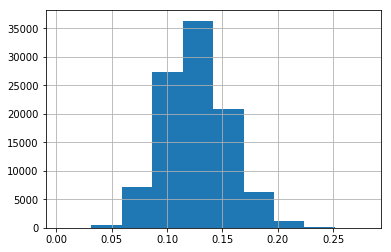

In [364]:
diff.hist()

In [365]:
# diff.sort_values().quantile(.05) == diff.quantile(.05)  # True

diff.quantile(.05), diff.quantile(.95)

(0.08108421135, 0.17627753144999997)

In [338]:
ci = OrderedDict((model, []) for model in models)

for model in models:
    for m in models:
        diff = bt[model] - bt[m]
        # mu, sd = diff.mean(), diff.std()
        # se = sd / pd.np.sqrt(diff.shape[0])
        # ci[model].append((round(mu-1.96*se, 3), round(mu+1.96*se, 3)))
        ci[model].append((round(diff.quantile(.05), 3), round(diff.quantile(.95), 3)))

In [339]:
ci = pd.DataFrame(ci)
ci.index = ci.columns

In [340]:
ci.transpose()

,B16,B16b,F17,F16,F15,C97,C97b
B16,"(0.0, 0.0)","(-0.009, -0.0)","(0.039, 0.112)","(0.056, 0.137)","(0.155, 0.292)","(0.169, 0.299)","(0.127, 0.247)"
B16b,"(0.0, 0.009)","(0.0, 0.0)","(0.043, 0.115)","(0.059, 0.14)","(0.157, 0.294)","(0.171, 0.302)","(0.129, 0.25)"
F17,"(-0.112, -0.039)","(-0.115, -0.043)","(0.0, 0.0)","(0.002, 0.048)","(0.095, 0.205)","(0.107, 0.212)","(0.053, 0.172)"
F16,"(-0.137, -0.056)","(-0.14, -0.059)","(-0.048, -0.002)","(0.0, 0.0)","(0.082, 0.177)","(0.081, 0.196)","(0.028, 0.155)"
F15,"(-0.292, -0.155)","(-0.294, -0.157)","(-0.205, -0.095)","(-0.177, -0.082)","(0.0, 0.0)","(-0.033, 0.052)","(-0.085, 0.012)"
C97,"(-0.299, -0.169)","(-0.302, -0.171)","(-0.212, -0.107)","(-0.196, -0.081)","(-0.052, 0.033)","(0.0, 0.0)","(-0.071, -0.025)"
C97b,"(-0.247, -0.127)","(-0.25, -0.129)","(-0.172, -0.053)","(-0.155, -0.028)","(-0.012, 0.085)","(0.025, 0.071)","(0.0, 0.0)"


# Contributions to Sh2

A factor's contribution to the model Sh2 is $(a_f/\sigma_e)^2$ where $a_f$ is the regression intercept and $\sigma_e$ is the standard deviation of the residuals.

In [20]:
model = b16

res = OrderedDict()
for factor in model:
    Y, X = f[factor], sm.add_constant(f[[l for l in model if l is not factor]])
    fit = sm.OLS(Y, X).fit()
    a, o = fit.params["const"], fit.resid.std()
    res[factor] = [a, o, (a/o)**2]

pd.DataFrame(res, index=["a", "sd", "(a/sd)^2"]).round(2)

,rm,smb,hmlm,wml,PMU
a,1.22,0.44,1.00,1.04,0.50
sd,3.85,2.79,2.36,3.07,1.17
(a/sd)^2,0.10,0.03,0.18,0.11,0.18


In [18]:
model = b16+["cma",]

res = OrderedDict()
for factor in model:
    Y, X = f[factor], sm.add_constant(f[[l for l in model if l is not factor]])
    fit = sm.OLS(Y, X).fit()
    a, o = fit.params["const"], fit.resid.std()
    res[factor] = [a, o, (a/o)**2]

pd.DataFrame(res, index=["a", "sd", "(a/sd)^2"]).round(2)

,rm,smb,hmlm,wml,PMU,cma
a,1.15,0.44,0.59,0.83,0.49,0.01
sd,3.73,2.79,1.83,2.76,1.17,1.41
(a/sd)^2,0.10,0.03,0.11,0.09,0.18,0.00


In [231]:
model = f16

res = OrderedDict()
for factor in model:
    Y, X = f[factor], sm.add_constant(f[[l for l in model if l is not factor]])
    fit = sm.OLS(Y, X).fit()
    a, o = fit.params["const"], fit.resid.std()
    res[factor] = [a, o, (a/o)**2]

pd.DataFrame(res, index=["a", "sd", "(a/sd)^2"]).round(2)

,rm,smb,hml,PMU,cma
a,1.05,0.46,0.29,0.49,0.14
sd,3.75,2.79,1.92,1.21,1.37
(a/sd)^2,0.08,0.03,0.02,0.16,0.01


In [19]:
model = ["rm", "smb", "hml", "wml", "PMU", "cma"]  # f17

res = OrderedDict()
for factor in model:
    Y, X = f[factor], sm.add_constant(f[[l for l in model if l is not factor]])
    fit = sm.OLS(Y, X).fit()
    a, o = fit.params["const"], fit.resid.std()
    res[factor] = [a, o, (a/o)**2]

pd.DataFrame(res, index=["a", "sd", "(a/sd)^2"]).round(2)

,rm,smb,hml,wml,PMU,cma
a,1.08,0.43,0.33,0.49,0.44,0.12
sd,3.74,2.78,1.89,3.94,1.18,1.37
(a/sd)^2,0.08,0.02,0.03,0.02,0.14,0.01


# Spanning Regressions

In [14]:
fit = sm.OLS(f["cma"], sm.add_constant(f[["hmlm", "wml"]])).fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cma   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     270.3
Date:                Sun, 11 Mar 2018   Prob (F-statistic):           3.53e-86
Time:                        21:07:02   Log-Likelihood:                -1184.8
No. Observations:                 654   AIC:                             2376.
Df Residuals:                     651   BIC:                             2389.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0421      0.061     -0.696      0.486      -0.161       0.077
hmlm           0.5189      0.022     23.238      0.000       0.475       0.563
wml            0.2620      0.018     14.446      0.000       0.226       0.298
==============================================================================
Omnibus:                       35.210   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.758
Skew:                          -0.128   Prob(JB):                     2.42e-24
Kurtosis:                       4.981   Cond. No.                         5.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
fit = sm.OLS(f["cma"], sm.add_constant(f[["rm", "smb", "hmlm", "wml", "PMU"]])).fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cma   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     130.8
Date:                Sun, 11 Mar 2018   Prob (F-statistic):           1.01e-95
Time:                        21:06:43   Log-Likelihood:                -1154.3
No. Observations:                 654   AIC:                             2321.
Df Residuals:                     648   BIC:                             2347.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0052      0.064      0.081      0.935      -0.120       0.130
rm            -0.0911      0.014     -6.307      0.000      -0.120      -0.063
smb            0.0003      0.020      0.016      0.987      -0.039       0.039
hmlm           0.4885      0.024     20.717      0.000       0.442       0.535
wml            0.2244      0.018     12.412      0.000       0.189       0.260
PMU            0.0961      0.047      2.026      0.043       0.003       0.189
==============================================================================
Omnibus:                       32.852   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.663
Skew:                          -0.197   Prob(JB):                     2.50e-19
Kurtosis:                       4.729   Cond. No.                         6.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
fit = sm.OLS(f["cma"], sm.add_constant(f[["hml", "wml"]])).fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cma   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     320.7
Date:                Sun, 11 Mar 2018   Prob (F-statistic):           1.15e-97
Time:                        21:05:46   Log-Likelihood:                -1158.2
No. Observations:                 654   AIC:                             2322.
Df Residuals:                     651   BIC:                             2336.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0754      0.057      1.322      0.187      -0.037       0.188
hml            0.5114      0.020     25.315      0.000       0.472       0.551
wml            0.0527      0.014      3.895      0.000       0.026       0.079
==============================================================================
Omnibus:                       32.304   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.901
Skew:                           0.204   Prob(JB):                     1.64e-18
Kurtosis:                       4.685   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
fit = sm.OLS(f["cma"], sm.add_constant(f[["rm", "smb", "hml", "wml", "PMU"]])).fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cma   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     149.3
Date:                Sun, 11 Mar 2018   Prob (F-statistic):          2.53e-105
Time:                        21:08:14   Log-Likelihood:                -1131.8
No. Observations:                 654   AIC:                             2276.
Df Residuals:                     648   BIC:                             2303.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1197      0.060      2.009      0.045       0.003       0.237
rm            -0.0871      0.014     -6.245      0.000      -0.115      -0.060
smb            0.0102      0.019      0.528      0.598      -0.028       0.048
hml            0.4786      0.021     22.485      0.000       0.437       0.520
wml            0.0302      0.014      2.226      0.026       0.004       0.057
PMU            0.0703      0.045      1.554      0.121      -0.019       0.159
==============================================================================
Omnibus:                       29.291   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.210
Skew:                           0.168   Prob(JB):                     1.27e-16
Kurtosis:                       4.604   Cond. No.                         5.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""